In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df['sex'].replace('male', 0, inplace=True)
df['sex'].replace('female', 1, inplace=True)
df['sex'] = df['sex'].astype('int64')

In [7]:
df['smoker'].replace('no', 0, inplace=True)
df['smoker'].replace('yes', 1, inplace=True)
df['smoker'] = df['smoker'].astype('int64')

In [428]:
region_cols = pd.get_dummies(df['region'])
region_cols.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [429]:
X = pd.concat([df[['age', 'sex', 'bmi', 'children', 'smoker']], region_cols, df['charges']], axis = 1)
X = X.drop('charges', axis=1)
X.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


In [430]:
y = df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
model = SGDRegressor(learning_rate='constant', eta0=0.0003, max_iter=100000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.coef_, end="\n\n")
print(r2_score(y_test, y_pred))

[  195.49971863  -607.31390261   144.97664059   363.92274813
 21852.44009914  -511.08541248  -833.91901566  -780.47683307
 -1243.78329087]

0.7046673956144962


In [166]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

In [415]:
def gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))
    
    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)
    
    return cost_track, params

In [416]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

In [427]:
track, weights = gradient_descent(X_train, y_train, 0.0003, 100000)

print(weights)

y_pred = predict(X_test, weights)
r2_score(y_test, y_pred)

[-8457.87437078   259.6225904    313.98133624   269.25503086
   384.77861279 24384.52644128 -1565.22706861 -1769.40699503
 -2489.77341823 -2632.09384063]


0.7144298522730927

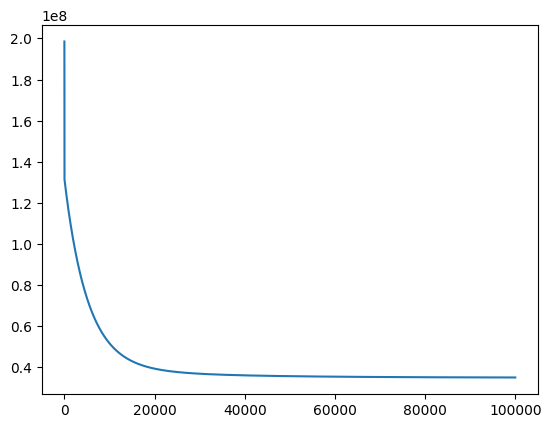

In [477]:
plt.plot(track)